# Data Preprocessing

In [ ]:
!pip install gensim
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import os

# Initialize NLTK stopwords
stop_words = set(stopwords.words('english'))

from tabulate import tabulate
import numpy as np
import pandas as pd
from scipy.spatial import distance
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from scipy import spatial
import string
import gensim.downloader as api
import string
import string
import seaborn as sns
sns.set_theme()

# importing packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to preprocess text
def preprocess(s):
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    s = s.translate(translator)
    # Remove numbers
    translator = str.maketrans('', '', '0123456789')
    s = s.translate(translator)
    # Tokenize text
    tokens = word_tokenize(s)
    # Remove stop words and convert tokens to lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    filtered_tokens = [stem for stem, token in zip(stemmed_tokens, tokens) if stem != token]
    return ' '.join(filtered_tokens)

# Function to read and preprocess a file
def read_and_preprocess(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read().replace('\n', ' ')
    # Preprocess the text
    preprocessed_text = preprocess(text)
    # Get the filename and construct the new filename for the preprocessed text
    filename = os.path.basename(file_path)
    new_filename = "data_PreP/PreP_" + filename
    # Write the preprocessed text to a new file
    with open(new_filename, 'w', encoding='utf-8') as new_file:
        new_file.write(preprocessed_text)
    return preprocessed_text

# List of file paths to process
file_paths = ["A_Furguson_EHCS.txt", "A_Furguson_HPOM.txt",
    "A_Smith_MORA.txt", "A_Smith_WEAL.txt",
    "A_Carlyle_ADAC.txt", "A_Carlyle_AMER.txt",
    "A_Geddes_TSPW.txt", "A_Geddes_LTRD.txt",
    "A_Grant_FNYG.txt", "A_Grant_PFPC.txt",
    "D_Hume_ECHU.txt", "D_Hume_ECPM.txt", "D_Hume_RELI.txt", "D_Hume_TRHN.txt",
    "G_Elliot_PWCE.txt", "G_Elliot_TOFC.txt",
    "H_Mackenzie_JADR.txt", "H_Mackenzie_MANO.txt",
    "H_Mackenzie_MOTW.txt", "H_Mackenzie_OTAF.txt",
    "H_Blair_CDPO.txt", "H_Blair_SERM.txt", "H_Blair_RBLE.txt",
    "J_Adams_POEL.txt", "J_Adams_ASPS.txt",
    "J_Beattie_MINS.txt", "J_Beattie_TEOT.txt", "J_Beattie_EOPM.txt",
    "J_Burnet_OOPL.txt", "J_Burnett_ATMP.txt",
    "J_Craig_PICE.txt",
    "J_Macpherson_FAPH.txt", "J_Macpherson_FING.txt", "J_Macpherson_TEMO.txt", "J_Macpherson_HOGB.txt",
    "J_Thomson_ALFR.txt", "J_Thomson_SEAS.txt", "J_Thomson_LIBE.txt",
    "J_Home_DOUG.txt", "J_Home_AGIS.txt", "J_Home_TSOA.txt",
    "J_Sinclair_OOSD.txt", "J_Sinclair_SAOS.txt", "J_Sinclair_COHL.txt",
    "M_Laing_HOSU1.txt",
    "R_Fergusson_POEM.txt",
    "S_Johnson_AJWI.txt", "S_Johnson_RASS.txt", "S_Johnson_LOTP.txt",
    "T_Sheridan_BEDU.txt", "T_Sheridan_ACOL.txt",
    "W_Shaw_EAPO.txt", "W_Shaw_AAGL.txt"]

# Dictionary to store preprocessed texts
preprocessed_texts = {}

# Process each file and save preprocessed text
for file_path in file_paths:
    file_path = "/content/data/" + file_path
    preprocessed_texts[file_path] = read_and_preprocess(file_path)

# Modeling

In [ ]:
model = api.load("glove-wiki-gigaword-50") #choose from multiple models https://github.com/RaRe-Technologies/gensim-data

In [ ]:
# List of file paths to process
preprocessed_texts = ["PreP_A_Furguson_EHCS.txt", "PreP_A_Furguson_HPOM.txt",
    "PreP_A_Smith_MORA.txt", "PreP_A_Smith_WEAL.txt",
    "PreP_A_Carlyle_ADAC.txt", "PreP_A_Carlyle_AMER.txt",
    "PreP_A_Geddes_TSPW.txt", "PreP_A_Geddes_LTRD.txt",
    "PreP_A_Grant_FNYG.txt", "PreP_A_Grant_PFPC.txt",
    "PreP_D_Hume_ECHU.txt", "PreP_D_Hume_ECPM.txt", "PreP_D_Hume_RELI.txt", "PreP_D_Hume_TRHN.txt",
    "PreP_G_Elliot_PWCE.txt", "PreP_G_Elliot_TOFC.txt",
    "PreP_H_Mackenzie_JADR.txt", "PreP_H_Mackenzie_MANO.txt",
    "PreP_H_Mackenzie_MOTW.txt", "PreP_H_Mackenzie_OTAF.txt",
    "PreP_H_Blair_CDPO.txt", "PreP_H_Blair_SERM.txt", "PreP_H_Blair_RBLE.txt",
    "PreP_J_Adams_POEL.txt", "PreP_J_Adams_ASPS.txt",
    "PreP_J_Beattie_MINS.txt", "PreP_J_Beattie_TEOT.txt", "PreP_J_Beattie_EOPM.txt",
    "PreP_J_Burnet_OOPL.txt", "PreP_J_Burnett_ATMP.txt",
    "PreP_J_Craig_PICE.txt",
    "PreP_J_Macpherson_FAPH.txt", "PreP_J_Macpherson_FING.txt", "PreP_J_Macpherson_TEMO.txt", "PreP_J_Macpherson_HOGB.txt",
    "PreP_J_Thomson_ALFR.txt", "PreP_J_Thomson_SEAS.txt", "PreP_J_Thomson_LIBE.txt",
    "PreP_J_Home_DOUG.txt", "PreP_J_Home_AGIS.txt", "PreP_J_Home_TSOA.txt",
    "PreP_J_Sinclair_OOSD.txt", "PreP_J_Sinclair_SAOS.txt", "PreP_J_Sinclair_COHL.txt",
    "PreP_M_Laing_HOSU1.txt",
    "PreP_R_Fergusson_POEM.txt",
    "PreP_S_Johnson_AJWI.txt", "PreP_S_Johnson_RASS.txt", "PreP_S_Johnson_LOTP.txt",
    "PreP_T_Sheridan_BEDU.txt", "PreP_T_Sheridan_ACOL.txt",
    "PreP_W_Shaw_EAPO.txt", "PreP_W_Shaw_AAGL.txt"]

#print(len(preprocessed_texts))


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
corpus = []

# Append preprocessed texts to the corpus
for preprocessed_text in preprocessed_texts:
    # Read the file
    with open("data_PreP/" + preprocessed_text, 'r', encoding='utf-8', errors='ignore') as file:
      text = file.read().replace('\n', ' ')
    corpus.append(text)

# Compute TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
# Get vectors using the pre-trained GloVe model
def get_vector(s):
    tokens = word_tokenize(s)
    vectors = []
    for token in tokens:
        if token in model.key_to_index:
            vectors.append(model[token])
    if vectors:
        return np.sum(np.array(vectors), axis=0)
    else:
        return np.zeros_like(model["hello"])  # Return a zero vector if no valid word vectors are found

# Cosine similarity with normalized vectors
def cosine_similarity(vec1, vec2):
    vec1_normalized = vec1 / np.linalg.norm(vec1)
    vec2_normalized = vec2 / np.linalg.norm(vec2)
    return np.dot(vec1_normalized, vec2_normalized)

# Calculate similarities
results = []
for i in range(len(corpus)):
  for j in range(i, len(corpus)) :
    sim = cosine_similarity(get_vector(corpus[i]), get_vector(corpus[j]))
    results.append([preprocessed_texts[i], preprocessed_texts[j], sim])

# Sort results based on similarity coefficients in descending order
results.sort(key=lambda x: x[2], reverse=True)

# Print table
print(tabulate(results, headers=["Text File 1", "Text File 2", "Cosine Similarity"]))

Text File 1                 Text File 2                   Cosine Similarity
--------------------------  --------------------------  -------------------
PreP_D_Hume_RELI.txt        PreP_D_Hume_RELI.txt                   1
PreP_A_Furguson_HPOM.txt    PreP_A_Furguson_HPOM.txt               1
PreP_A_Geddes_TSPW.txt      PreP_A_Geddes_TSPW.txt                 1
PreP_G_Elliot_TOFC.txt      PreP_G_Elliot_TOFC.txt                 1
PreP_H_Blair_CDPO.txt       PreP_H_Blair_CDPO.txt                  1
PreP_H_Blair_SERM.txt       PreP_H_Blair_SERM.txt                  1
PreP_J_Burnet_OOPL.txt      PreP_J_Burnet_OOPL.txt                 1
PreP_J_Craig_PICE.txt       PreP_J_Craig_PICE.txt                  1
PreP_J_Thomson_LIBE.txt     PreP_J_Thomson_LIBE.txt                1
PreP_J_Home_DOUG.txt        PreP_J_Home_DOUG.txt                   1
PreP_J_Home_AGIS.txt        PreP_J_Home_AGIS.txt                   1
PreP_R_Fergusson_POEM.txt   PreP_R_Fergusson_POEM.txt              1
PreP_T_Sheridan_ACOL

(array([  2.,   2.,   1.,   2.,   1.,   4.,   5.,   4.,   3.,   5.,   7.,
          8.,  10.,  10.,  17.,  15.,  35.,  19.,  26.,  33.,  41.,  49.,
         57.,  40.,  55.,  47.,  53.,  48.,  40.,  49.,  56.,  82.,  87.,
         97., 105.,  93.,  78.,  57.,  30.,  58.]),
 array([0.60274225, 0.6126737 , 0.62260514, 0.63253659, 0.64246804,
        0.65239948, 0.66233093, 0.67226243, 0.68219388, 0.69212532,
        0.70205677, 0.71198821, 0.72191966, 0.7318511 , 0.74178255,
        0.75171399, 0.76164544, 0.77157688, 0.78150833, 0.79143977,
        0.80137122, 0.81130272, 0.82123417, 0.83116561, 0.84109706,
        0.8510285 , 0.86095995, 0.87089139, 0.88082284, 0.89075428,
        0.90068573, 0.91061717, 0.92054862, 0.93048006, 0.94041157,
        0.95034301, 0.96027446, 0.9702059 , 0.98013735, 0.99006879,
        1.00000024]),
 <BarContainer object of 40 artists>)

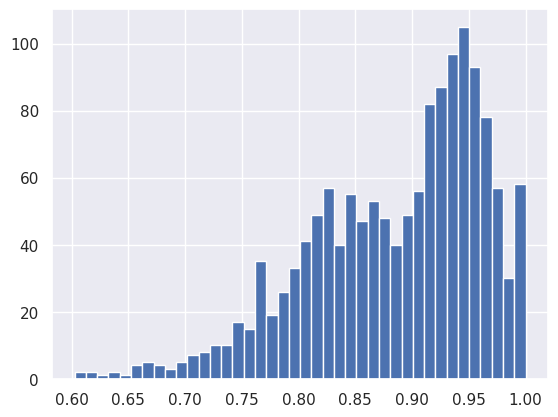

In [ ]:
import matplotlib.pyplot as plt
plt.hist([sublist[2] for sublist in results], bins = 40)

In [ ]:
print(type(results))
print(type(results[0]))

In [ ]:
# Extract unique labels
x_labels = sorted(set(item[0] for item in results))
y_labels = sorted(set(item[1] for item in results))

# Create a dictionary to map labels to indices
label_to_index = {label: idx for idx, label in enumerate(x_labels)}

# Initialize the matrix with NaNs (or zeros)
size = len(x_labels)
A = np.full((size, size), np.nan)

# Fill the matrix with the provided values
for x_label, y_label, value in results:
    x_idx = label_to_index[x_label]
    y_idx = label_to_index[y_label]
    A[x_idx, y_idx] = value
    A[y_idx, x_idx] = value  # Ensure symmetry

np.fill_diagonal(A, 0)
np.save('A.npy', A)

# Networks

The A.npy contains the adjacency matrix of the similarities between the texts we are analyzing. It must be uploaded to the files section of this colab document in order for it to run. Each entry corresponds with the similarity score between the ith column and jth row.

labels.csv contains a list of what work corresponds with each index.

In [ ]:
A = np.load('A.npy')
print(A)

# Complete Weighted Network

Let us first consider perhaps the simplest case. We will create a complete network, with all pairs of nodes having a connection between them. These connections will be undirected. They will be weighted with the similarity value between the nodes. Essentially, we are just treating A as our final adjacency matrix.

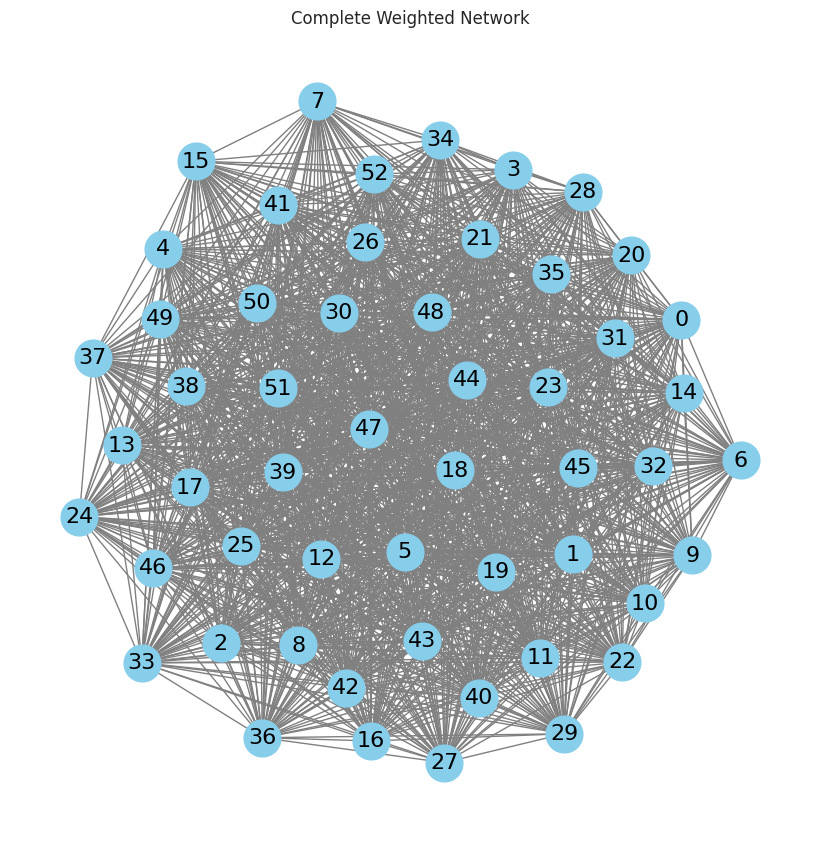

In [ ]:
G = nx.from_numpy_array(A)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Complete Weighted Network")
plt.show()

In [ ]:
degree = {v: sum(d['weight'] for u, v, d in G.edges(v, data=True)) for v in G.nodes()}

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 48: Degree = 48.05725848674774
Node 49: Degree = 47.94300448894501
Node 38: Degree = 47.93562215566635
Node 17: Degree = 47.91361278295517
Node 20: Degree = 47.90133601427078


Top 5 nodes with lowest degree:
Node 15: Degree = 37.637304961681366
Node 7: Degree = 40.22168183326721
Node 33: Degree = 40.82250142097473
Node 30: Degree = 41.073293685913086
Node 31: Degree = 41.80874311923981


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 48: Pagerank = 0.019640862290665514
Node 49: Pagerank = 0.019600060509937872
Node 38: Pagerank = 0.01959805286957431
Node 17: Pagerank = 0.019589247609380793
Node 20: Pagerank = 0.019586955214403238


Top 5 nodes with lowest pagerank:
Node 15: Pagerank = 0.015994275078069567
Node 7: Pagerank = 0.016896933226243454
Node 33: Pagerank = 0.017110579945823778
Node 30: Pagerank = 0.017193038211889403
Node 31: Pagerank = 0.017454915109691348


## Minimally Connected Network

The term "minimally connected network" is my own invention. Essentially, for this version, we use our knowledge that all of these works are clearly from the Scottish Enlightenment. Thus, we operate under the assumption that, at minimum, each work should be connected to at least one other work.

Thus, we minmax a similarity threshold to build our network. For each work, we find the maximum value of similarity to another work. Then, we find the minimum value of this across all works. Then we build an undirected, simple network of 0s and 1s such that we only connect networks if their similarity is at or above that threshold. This will be the network with the least amoutn of connections that will still ensure that all works are included in the network.

We see that, additionally, this also results in the additional fact that the graph is not bipartite.

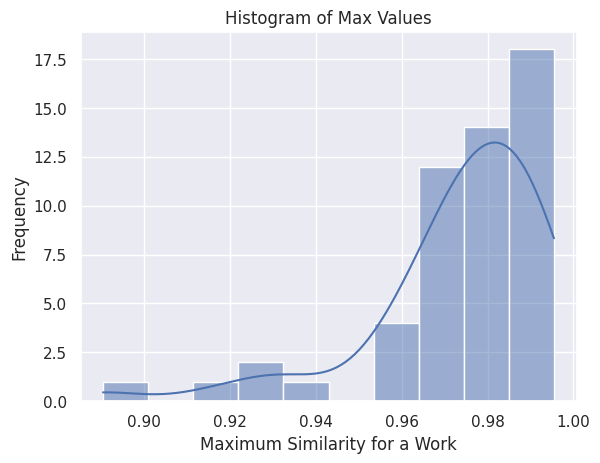

In [ ]:
max_values = np.max(A, axis=0).tolist()
sns.histplot(max_values, kde = True)

plt.title('Histogram of Max Values')
plt.xlabel('Maximum Similarity for a Work')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
print("Minmax threshold")
print(min(max_values))

A_2 = (A >= min(max_values)).astype(int)
print(A_2)

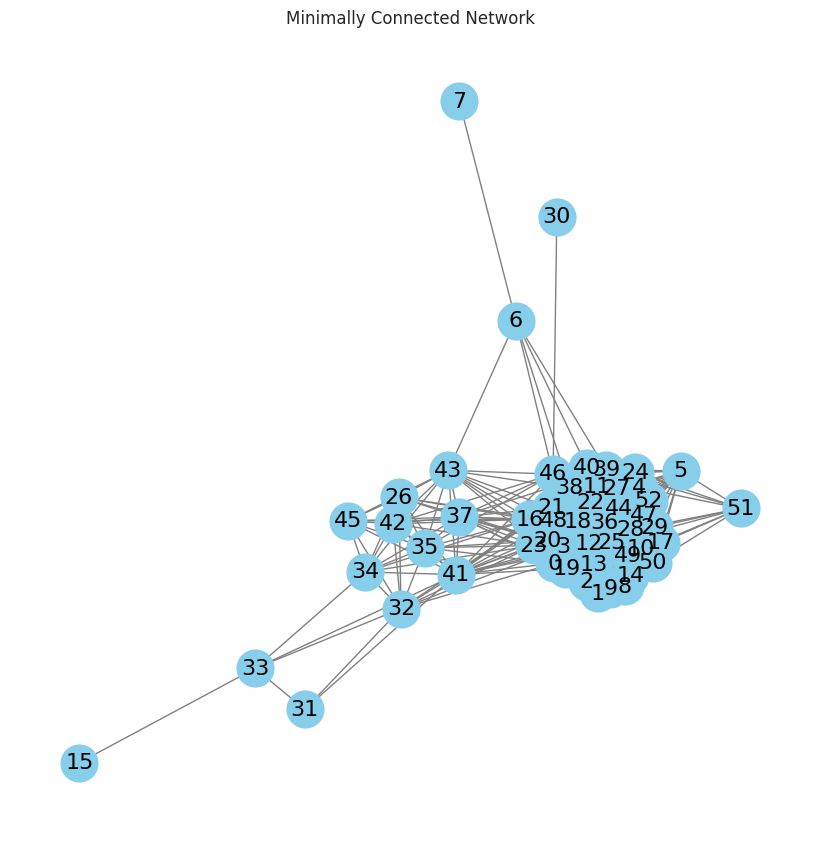

In [ ]:
G = nx.from_numpy_array(A_2)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Minimally Connected Network")
plt.show()

Our centrality measures for unweighted, undirected graphs will be degree, betweeness, and pagerank.
Node with the highest degree

In [ ]:
degree = nx.degree_centrality(G)

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 16: Degree = 0.826923076923077
Node 46: Degree = 0.826923076923077
Node 23: Degree = 0.7884615384615385
Node 0: Degree = 0.7692307692307693
Node 20: Degree = 0.7692307692307693


Top 5 nodes with lowest degree:
Node 7: Degree = 0.019230769230769232
Node 15: Degree = 0.019230769230769232
Node 30: Degree = 0.019230769230769232
Node 31: Degree = 0.057692307692307696
Node 33: Degree = 0.09615384615384616


In [ ]:
betweenness = nx.betweenness_centrality(G)

# Print the top 5 nodes with highest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = True)
print("Top 5 nodes with highest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = False)
print("Top 5 nodes with lowest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

Top 5 nodes with highest betweenness:
Node 41: Betweenness = 0.08878193689057429
Node 46: Betweenness = 0.07935368606275053
Node 16: Betweenness = 0.06406145172842796
Node 23: Betweenness = 0.04149610001860501
Node 33: Betweenness = 0.03871292106586224


Top 5 nodes with lowest betweenness:
Node 7: Betweenness = 0.0
Node 15: Betweenness = 0.0
Node 30: Betweenness = 0.0
Node 31: Betweenness = 0.0
Node 51: Betweenness = 0.0


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 46: Pagerank = 0.030058029481654074
Node 16: Pagerank = 0.02816181467949062
Node 23: Pagerank = 0.0265263034547147
Node 20: Pagerank = 0.02528037211323112
Node 0: Pagerank = 0.025199042191845218


Top 5 nodes with lowest pagerank:
Node 30: Pagerank = 0.0034243591783792784
Node 7: Pagerank = 0.0041566524601384745
Node 15: Pagerank = 0.004786101581871285
Node 31: Pagerank = 0.006550571542848327
Node 51: Pagerank = 0.00813030923095169


# Empirical Threshold.

It looks like there is a big jump in number of connections starting right after .91 according to various histograms. So let's set .91 as our threshold

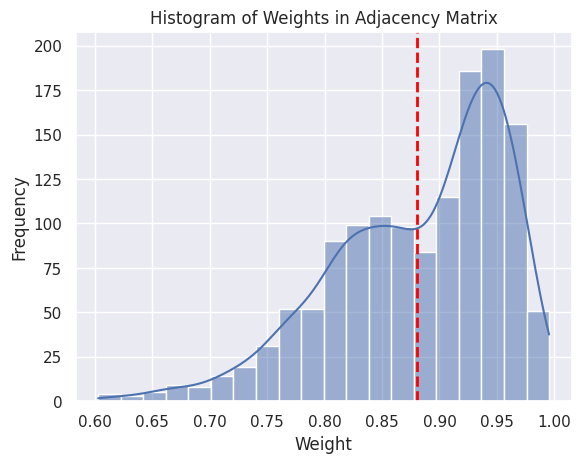

In [ ]:
weights = A[np.triu_indices(A.shape[0], k=1)]

# Plotting histogram of weights
sns.histplot(weights, kde = True)
plt.axvline(x = .88,
            color = 'red',
            linestyle = '--',
            linewidth = 2)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weights in Adjacency Matrix')
plt.show()

In [ ]:
A_3 = (A >= .91).astype(int)
print(A_3)

G = nx.from_numpy_array(A_3)

# Draw the graph
plt.figure(figsize = (8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Empirically Connected Network")
plt.show()

In [ ]:
degree = nx.degree_centrality(G)

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 16: Degree = 0.7115384615384616
Node 20: Degree = 0.7115384615384616
Node 48: Degree = 0.7115384615384616
Node 49: Degree = 0.7115384615384616
Node 17: Degree = 0.6923076923076923


Top 5 nodes with lowest degree:
Node 30: Degree = 0.0
Node 7: Degree = 0.019230769230769232
Node 15: Degree = 0.019230769230769232
Node 6: Degree = 0.057692307692307696
Node 31: Degree = 0.057692307692307696


In [ ]:
betweenness = nx.betweenness_centrality(G)

# Print the top 5 nodes with highest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = True)
print("Top 5 nodes with highest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = False)
print("Top 5 nodes with lowest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

Top 5 nodes with highest betweenness:
Node 41: Betweenness = 0.11011146309411936
Node 23: Betweenness = 0.07827890130620047
Node 46: Betweenness = 0.07361620280761813
Node 20: Betweenness = 0.0619650872560638
Node 43: Betweenness = 0.059266056878384175


Top 5 nodes with lowest betweenness:
Node 7: Betweenness = 0.0
Node 15: Betweenness = 0.0
Node 26: Betweenness = 0.0
Node 30: Betweenness = 0.0
Node 31: Betweenness = 0.0


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 16: Pagerank = 0.026571376900607863
Node 20: Pagerank = 0.026473170178332808
Node 48: Pagerank = 0.025670410164745548
Node 46: Pagerank = 0.025412921596872074
Node 49: Pagerank = 0.025104395633937557


Top 5 nodes with lowest pagerank:
Node 30: Pagerank = 0.0028763183125599234
Node 7: Pagerank = 0.005563832190868969
Node 15: Pagerank = 0.0057617623029758355
Node 51: Pagerank = 0.005960059452199138
Node 31: Pagerank = 0.009010983544199776
